# Multinomial Logistic Regression (SoftMax) Exercise

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.style.use('ggplot')

# Fix the seed of the random number 
# generator so that your results will match ours
np.random.seed(1)

%load_ext autoreload
%autoreload 2

(1000, 2)
(1000,)


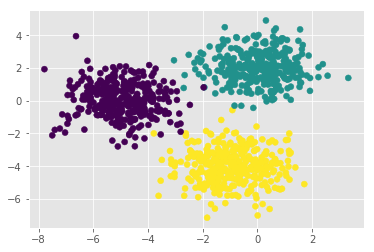

In [2]:
from sklearn.datasets import make_blobs
centers = [[-5, 0], [0, 2], [-1, -4]]
X, y = make_blobs(n_samples=1000, centers=centers)
plt.scatter(X[:,0], X[:,1],c=y)
print(X.shape)
print(y.shape)


In [3]:
from multinomial_logistic_regression import MultinomialLogisticRegression

In [4]:
num_classes = 3
D = 2
classifier = MultinomialLogisticRegression(D,num_classes,std_dev = 1e-2)
loss_history = classifier.train(X, y, learning_rate=0.9, reg=0.0, num_iters=5000, batch_size=256, verbose=True)

iteration 0 / 5000: loss 1.107406
iteration 100 / 5000: loss 0.513444
iteration 200 / 5000: loss 0.383395
iteration 300 / 5000: loss 0.283512
iteration 400 / 5000: loss 0.243218
iteration 500 / 5000: loss 0.219281
iteration 600 / 5000: loss 0.208768
iteration 700 / 5000: loss 0.159684
iteration 800 / 5000: loss 0.160842
iteration 900 / 5000: loss 0.157109
iteration 1000 / 5000: loss 0.150268
iteration 1100 / 5000: loss 0.146431
iteration 1200 / 5000: loss 0.130435
iteration 1300 / 5000: loss 0.133183
iteration 1400 / 5000: loss 0.111569
iteration 1500 / 5000: loss 0.107258
iteration 1600 / 5000: loss 0.101628
iteration 1700 / 5000: loss 0.086204
iteration 1800 / 5000: loss 0.115611
iteration 1900 / 5000: loss 0.099083
iteration 2000 / 5000: loss 0.084670
iteration 2100 / 5000: loss 0.093026
iteration 2200 / 5000: loss 0.086033
iteration 2300 / 5000: loss 0.081732
iteration 2400 / 5000: loss 0.074269
iteration 2500 / 5000: loss 0.078304
iteration 2600 / 5000: loss 0.083373
iteration 270

In [5]:
Y_train_pred = classifier.predict(X)
print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_train_pred - y)) * 100))

Train accuracy: 99.1 %


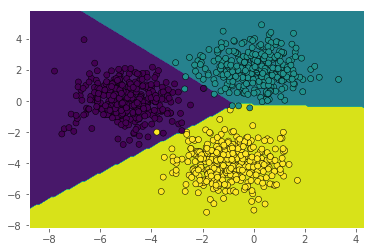

In [6]:
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


x_test = np.squeeze(np.stack((xx.ravel(),yy.ravel()))).T
Z = classifier.predict(x_test)

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')

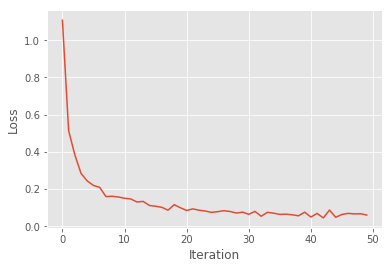

In [7]:
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")

Train accuracy: 99.3 %


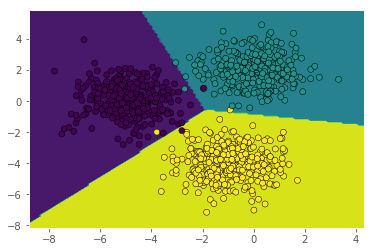

In [8]:
num_classes = 3
D = 2
classifier = MultinomialLogisticRegression(D,num_classes,std_dev = 1e-2)
loss_history = classifier.train(X, y, learning_rate=0.9, reg=0.1, num_iters=5000, batch_size=256, verbose=False)

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


x_test = np.squeeze(np.stack((xx.ravel(),yy.ravel()))).T
Z = classifier.predict(x_test)

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')

Y_train_pred = classifier.predict(X)
print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_train_pred - y)) * 100))

In [9]:
print("Weights =", classifier.params["W"])
print("bias =",classifier.params["b"])

Weights = [[-0.03691813  0.02420601  0.01271213]
 [ 0.00780791  0.03159581 -0.03940372]]
bias = [-0.06425382  0.06394115  0.00031267]
